In [1]:
%run ./PullData.py
MAIN_DATA = "/home/asmodi/Code/git/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"                                                                                    
US_DATA = "/home/asmodi/Code/git/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/"

In [11]:
Df = get_data(URL = "../../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/",
              US_URL = "../../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/",
              Level = ['Country','FIPS'],
               switch_USA = False)

Pulling all data
skiping
Returning Data


In [17]:
Df_fips = pd.read_csv("/home/asmodi/Downloads/fips_to_county.csv")

In [19]:
Df = pd.merge(Df, 
              Df_fips \
                  .assign(FIPS = lambda x: x.fipscounty,
                         County = lambda x: x.county.str.lower())\
                  [['FIPS','County']]
              , how = 'inner', on = ['FIPS'])

In [32]:

Df_fips.query("state == 'OH' and county == 'HAMILTON'")

,county,state,ssacounty,fipscounty,cbsa,cbsaname,ssastate,fipsstate
2108,HAMILTON,OH,36310,39061,17140.0,"Cincinnati, OH-KY-IN",36,39


FIPS
5007.0     AxesSubplot(0.125,0.125;0.775x0.755)
12031.0    AxesSubplot(0.125,0.125;0.775x0.755)
39061.0    AxesSubplot(0.125,0.125;0.775x0.755)
40147.0    AxesSubplot(0.125,0.125;0.775x0.755)
48029.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

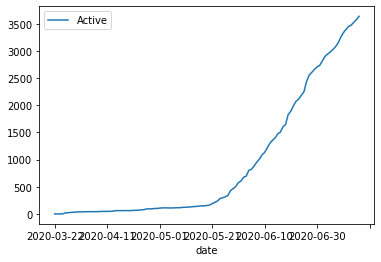

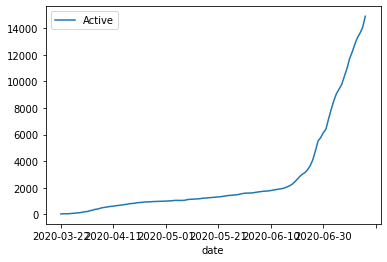

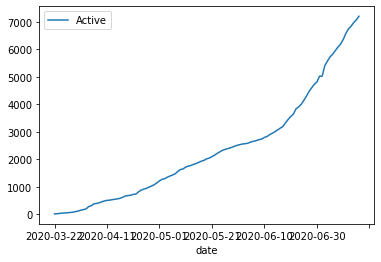

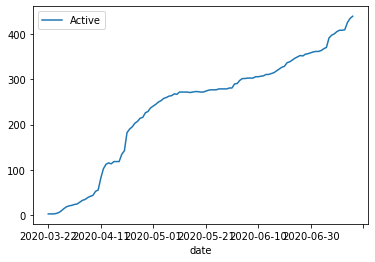

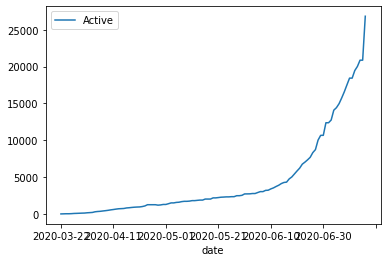

In [35]:
#Bentoncount = 5007
#Duval, fl = 12031
#Washington, OK = 40147
#BAxter, tx = 48029
# Hamilton, OH = 39061
Df.query("FIPS in ['5007','12031','40147','48029','39061']")\
    .set_index('date')\
    .groupby("FIPS")\
    [['Active']]\
    .plot()